In [30]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [31]:
(train, test), info = tfds.load(name = "mnist", split = ['train', 'test'], as_supervised = True, with_info = True)

In [32]:
print(info)

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_path='C:\\Users\\mikel\\tensorflow_datasets\\mnist\\3.0.1',
    file_format=tfrecord,
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
)

In [33]:
def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  return tf.cast(image, tf.float32) / 255., label

In [34]:
train = train.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
train = train.cache()
train = train.shuffle(info.splits['train'].num_examples)
train = train.batch(128)
train = train.prefetch(tf.data.AUTOTUNE)

test = test.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
test = test.batch(128)
test = test.cache()
test = test.prefetch(tf.data.AUTOTUNE)


In [47]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10)
])

Epoch 1/6
469/469 [==============================] - 1s 2ms/step - loss: 0.3464 - sparse_categorical_accuracy: 0.9045 - val_loss: 0.1843 - val_sparse_categorical_accuracy: 0.9483
Epoch 2/6
469/469 [==============================] - 1s 2ms/step - loss: 0.1575 - sparse_categorical_accuracy: 0.9552 - val_loss: 0.1342 - val_sparse_categorical_accuracy: 0.9601
Epoch 3/6
469/469 [==============================] - 1s 2ms/step - loss: 0.1137 - sparse_categorical_accuracy: 0.9672 - val_loss: 0.1143 - val_sparse_categorical_accuracy: 0.9660
Epoch 4/6
469/469 [==============================] - 1s 2ms/step - loss: 0.0896 - sparse_categorical_accuracy: 0.9739 - val_loss: 0.0928 - val_sparse_categorical_accuracy: 0.9716
Epoch 5/6
469/469 [==============================] - 1s 2ms/step - loss: 0.0715 - sparse_categorical_accuracy: 0.9800 - val_loss: 0.0826 - val_sparse_categorical_accuracy: 0.9741
Epoch 6/6
469/469 [==============================] - 1s 2ms/step - loss: 0.0594 - sparse_categorical_accu

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

In [ ]:
#train model
history = model.fit(
    train,
    epochs=6,
    validation_data=test,
)

In [44]:
import pandas as pd

<AxesSubplot: >

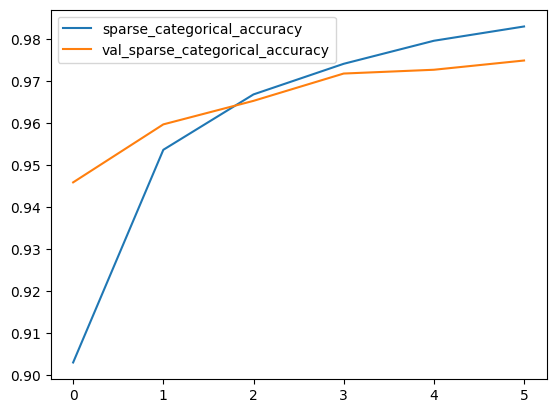

In [46]:
history_df = pd.DataFrame.from_dict(history.history)
history_df[["sparse_categorical_accuracy","val_sparse_categorical_accuracy"]].plot()